In [213]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from joblib import dump


In [214]:
df = pd.read_csv('ReadyForModelling.csv')
df.head()

,age,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_10th,...,occupation_Tech-support,occupation_Transport-moving,gender_Female,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,gender_Male,native-country_United-States
0,-12.821508,4.507422,-0.371684,0.099345,-0.212233,0.220428,1.288785,-0.011322,0.030645,-0.057841,...,-0.006278,-0.003823,-0.003554,0.000680,-0.000003,-2.705150e-15,3.436386e-15,1.405627e-14,-1.753809e-14,1.598425e-14
1,3.079952,8.541925,-0.408739,0.726707,0.037753,-0.074256,-0.161339,-0.007853,0.030762,-0.032715,...,-0.018166,-0.015241,-0.008616,-0.005985,-0.000901,4.748977e-16,-3.284986e-15,3.842325e-15,-1.637015e-14,1.806738e-14
2,-10.055062,3.321547,-0.511341,-0.541845,0.758273,0.293498,-0.111608,-0.053043,-0.061973,-0.025820,...,-0.012436,-0.001908,-0.002165,-0.001191,-0.000629,-1.435506e-13,-4.981461e-16,-9.181779e-16,1.817067e-16,-1.461438e-15
3,4.620907,-3.020054,-0.241089,-0.144611,-0.784116,0.798772,1.104555,0.033704,0.058187,0.030589,...,-0.002487,-0.009599,-0.003640,-0.000142,-0.000015,5.994666e-13,1.728836e-15,4.878508e-16,-7.327313e-15,1.012066e-14
4,-8.519213,-8.240145,-0.551214,-0.030119,-0.244617,-0.155715,0.052097,-0.112363,-0.075561,-0.586935,...,0.005283,-0.011093,-0.004128,0.000433,-0.000167,1.096233e-12,7.518276e-15,-3.088005e-16,2.263917e-15,-4.217668e-15


In [215]:
data = pd.read_csv('ReadyForModelling_OG.csv')
# data.drop("workclass", axis=1, inplace=True)
data.head()

,age,capital-gain,capital-loss,hours-per-week,income,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,-0.146811,-0.218899,40,<=50K,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
1,38,-0.146811,-0.218899,50,<=50K,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
2,28,-0.146811,-0.218899,40,>50K,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,44,0.876868,-0.218899,40,>50K,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
4,34,-0.146811,-0.218899,30,<=50K,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False


In [216]:
columns = df.columns

# Print all columns
for column in columns:
    print(column)
    


age
hours-per-week
workclass_Federal-gov
workclass_Local-gov
workclass_Private
workclass_Self-emp-inc
workclass_Self-emp-not-inc
workclass_State-gov
workclass_Without-pay
education_10th
education_11th
education_12th
education_1st-4th
education_5th-6th
education_7th-8th
education_9th
education_Assoc-acdm
education_Assoc-voc
education_Bachelors
education_Doctorate
education_HS-grad
education_Masters
education_Preschool
education_Prof-school
education_Some-college
occupation_Adm-clerical
occupation_Armed-Forces
occupation_Craft-repair
occupation_Exec-managerial
occupation_Farming-fishing
occupation_Handlers-cleaners
occupation_Machine-op-inspct
occupation_Other-service
occupation_Priv-house-serv
occupation_Prof-specialty
occupation_Protective-serv
occupation_Sales
occupation_Tech-support
occupation_Transport-moving
gender_Female
race_Amer-Indian-Eskimo
race_Asian-Pac-Islander
race_Black
race_Other
race_White
gender_Male
native-country_United-States


In [217]:
df['income'] = data['income']
df['income'] = df['income'].apply(lambda x: 1 if x == '>50K' else 0)

X = df.drop(columns=['income'])
y = df['income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [218]:
model = LogisticRegression(max_iter=100000000000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=100000000000)

In [219]:
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')


Accuracy: 0.8048699501936912


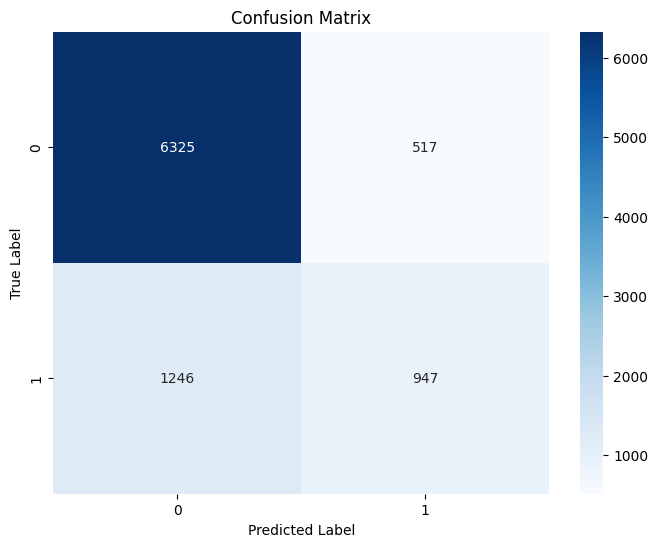

In [220]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

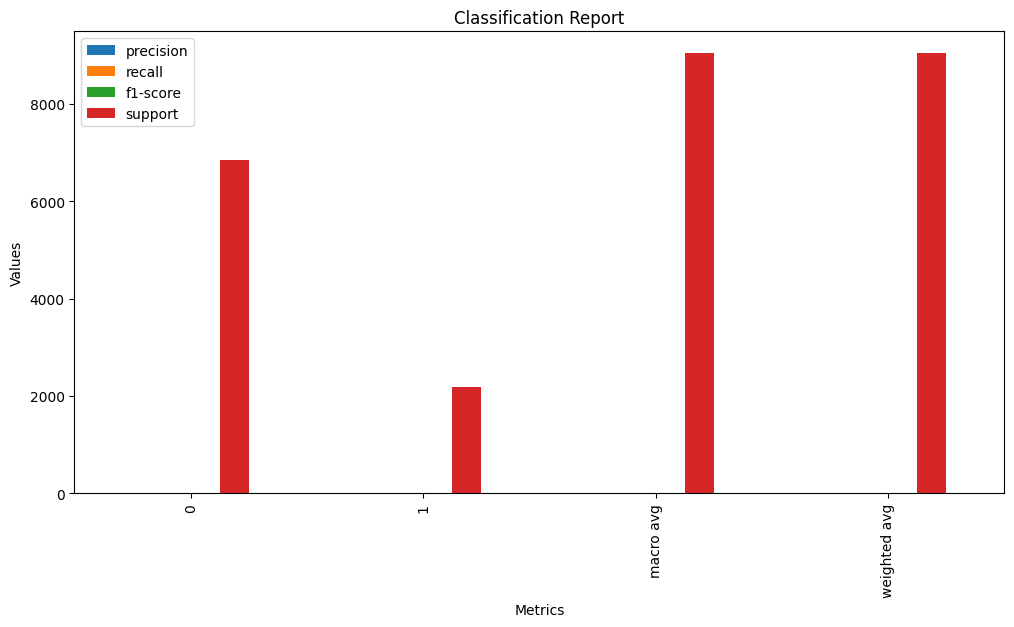

In [221]:
# Classification Report
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Plotting the Classification Report
report_df.drop(['accuracy'], inplace=True)  # Remove the 'accuracy' row for plotting
report_df.plot(kind='bar', figsize=(12, 6))
plt.title('Classification Report')
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.show()

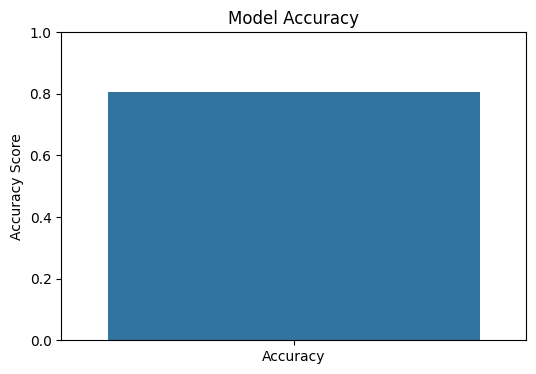

In [222]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Plot accuracy
plt.figure(figsize=(6, 4))
sns.barplot(x=['Accuracy'], y=[accuracy])
plt.title('Model Accuracy')
plt.ylabel('Accuracy Score')
plt.ylim(0, 1)  # Set the limit from 0 to 1 as accuracy ranges between these values
plt.show()

In [223]:
dump(model, 'Model.joblib')


['Model.joblib']